In [94]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [23]:
df=pd.read_csv("data/data.csv")

In [24]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [25]:
df["Total"]=df.math_score+df.reading_score+df.writing_score
#df["Average"]=round(df.Total/3)

In [26]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [ ]:
#df1=df.drop(columns=["math_score","reading_score","writing_score"],axis=1)

In [27]:

X=df.drop("Total",axis=1)
Y=df["Total"]

In [34]:
df_numerical= [column for column in X.columns if X[column].dtypes!="O"]
df_cat= [column for column in X.columns if X[column].dtypes=="O"]

In [42]:
from sklearn.compose import ColumnTransformer
ohe_tranform=OneHotEncoder()
std_scale=StandardScaler()
transformer=ColumnTransformer(
    [
        ("OneHotEncoder",ohe_tranform,df_cat),
        ("StandardScaler",std_scale,df_numerical),
    ]
)

In [43]:
X=transformer.fit_transform(X)

In [45]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

In [46]:
def evaluation(test,pred):
    mse=mean_squared_error(test,pred)
    mae=mean_absolute_error(test,pred)
    r_square=r2_score(test,pred)
    return mse,mae,r_square

In [78]:
models={"LinearRegression":LinearRegression(),
        "Lasso":Lasso(),
        "Ridge":Ridge(),
        "RandomForestregressor":RandomForestRegressor()}
model_output=[]
r2=[]

for i in range(len(models)):
    model=list(models.values())[i]
    model.fit(X_train,Y_train)

    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    mse_result,mae_result,r_result=evaluation(Y_test,y_test_pred)
    mse_result_train,mae_result_train,r_result_train=evaluation(Y_train,y_train_pred)

    print(list(models.keys())[i])
    model_output.append(list(models.keys())[i])
    print("Results on test data")
    print("Mean square error{:.4f}:".format(mse_result))
    print("Mean absolute error{:.4f}:".format(mae_result))
    print("R_square{:.4f}:".format(r_result))
    print("--------------------------------------------------")

    print("Results on train data")
    print("Mean square error{:.4f}:".format(mse_result_train))
    print("Mean absolute error{:.4f}:".format(mae_result_train))
    print("R_square{:.4f}:".format(r_result_train))
    r2.append(r_result)

    print("========================================")
   


LinearRegression
Results on test data
Mean square error0.0000:
Mean absolute error0.0000:
R_square1.0000:
--------------------------------------------------
Results on train data
Mean square error0.0000:
Mean absolute error0.0000:
R_square1.0000:
Lasso
Results on test data
Mean square error1.2409:
Mean absolute error0.8764:
R_square0.9994:
--------------------------------------------------
Results on train data
Mean square error1.1330:
Mean absolute error0.8505:
R_square0.9994:
Ridge
Results on test data
Mean square error0.0007:
Mean absolute error0.0201:
R_square1.0000:
--------------------------------------------------
Results on train data
Mean square error0.0006:
Mean absolute error0.0195:
R_square1.0000:
RandomForestregressor
Results on test data
Mean square error12.1582:
Mean absolute error1.5667:
R_square0.9937:
--------------------------------------------------
Results on train data
Mean square error0.7314:
Mean absolute error0.5533:
R_square0.9996:


In [88]:
pd.DataFrame(list(zip(model_output,r2)),columns=["Model_Name","R2_Square"]).sort_values(by="R2_Square", ascending=False)

,Model_Name,R2_Square
0,LinearRegression,1.000000
2,Ridge,1.000000
1,Lasso,0.999357
3,RandomForestregressor,0.993698


In [97]:
lin_model=LinearRegression(fit_intercept=True)
lin_model.fit(X_train,Y_train)
score=r2_score(Y_test,y_pred)*100

In [98]:
score

100.0

In [90]:
y_pred=lin_model.predict(X_test)

ValueError: s must be a scalar, or float array-like with the same size as x and y

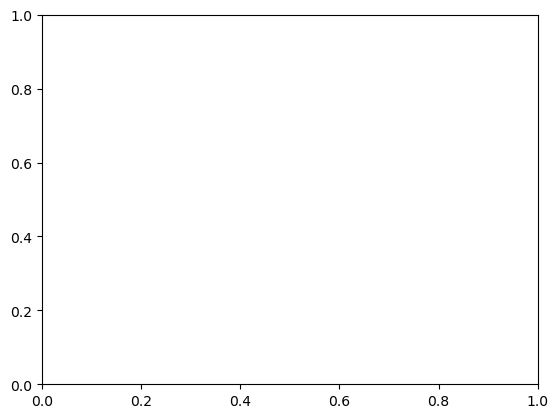

In [ ]:
plt.scatter(Y_test,y_pred)